# Customer Category Prediction 

## 1. Introduction

### 1.1 Background
**Customer Segmentation** is the process of partitioning a customer base into groups of individuals that have similar characteristics ("Clustering them").

A Telecommunication provider has segmented its customer base by service usage patterns, categorizing the customers into four groups:<br>
1- Basic Service.<br>
2- E-Service.<br>
3- Plus Service.<br>
4- Total Service.<br>

### 1.2 Problem Description: 
If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

### 1.3 Objective: 
Our objective is to build a classifier, to predict the class of unknown cases.<br>
So, we need to determine which classification algorithm would be the best suited to create our model. 

## 2. Data: 
We are going to use a dataset pulled out from the telecommunication company database, and we ensured that it does not contains any PII.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**.

## 3. Methodology

Let's start by import the initial libraries needed in this project: 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [2]:
path=r'teleCust1000t.csv'
df= pd.read_csv(path)
print(df.shape)
df.head()

(1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### 3.1 Exploratory Data Analysis

In [3]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


As we can see the data is almost cleaned except the income which looks to be have an outliers as its STD does not make sense.<br>
lets have a look at the max income value

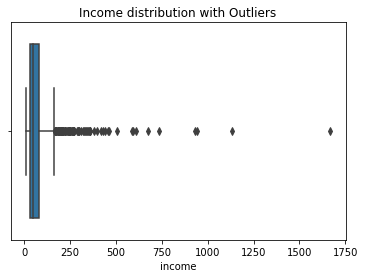

In [4]:
sns.boxplot(x=df['income'])
plt.title('Income distribution with Outliers')
plt.show()

It's obvious that we have a lot of outliers and these outliers will affect our analysis.<br>
So, let's remove those over 750 (4 rows)

In [5]:
from scipy import stats
df= df[stats.zscore(df['income']) < 7]

In [6]:
df['income'].describe()

count    996.000000
mean      73.156627
std       79.663120
min        9.000000
25%       29.000000
50%       47.000000
75%       83.000000
max      732.000000
Name: income, dtype: float64

Now it's better as the Income std is 79

Let's have a look at the correlation between the variables 

In [7]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.013068,0.012008,-0.079861,0.007687,0.016956,-0.059502,0.012102,0.005858,0.049618,-0.062600,-0.025467
tenure,0.013068,1.000000,0.487708,0.158357,0.521060,0.284077,-0.112543,0.517841,0.172364,0.023994,-0.033818,0.164508
age,0.012008,0.487708,1.000000,-0.008846,0.658978,0.363621,-0.159196,0.666549,0.432680,-0.011138,-0.252339,0.054608
marital,-0.079861,0.158357,-0.008846,1.000000,-0.006104,-0.004679,0.004116,0.006071,-0.079155,0.008243,0.625805,0.085931
address,0.007687,0.521060,0.658978,-0.006104,1.000000,0.231048,-0.135651,0.457711,0.295601,0.007336,-0.199477,0.063817
income,0.016956,0.284077,0.363621,-0.004679,0.231048,1.000000,0.115401,0.581645,-0.100402,0.047120,-0.095421,0.164220
ed,-0.059502,-0.112543,-0.159196,0.004116,-0.135651,0.115401,1.000000,-0.236343,-0.113932,0.003537,0.023286,0.192620
employ,0.012102,0.517841,0.666549,0.006071,0.457711,0.581645,-0.236343,1.000000,0.282541,0.048342,-0.130487,0.106675
retire,0.005858,0.172364,0.432680,-0.079155,0.295601,-0.100402,-0.113932,0.282541,1.000000,0.053989,-0.140848,0.009329
gender,0.049618,0.023994,-0.011138,0.008243,0.007336,0.047120,0.003537,0.048342,0.053989,1.000000,0.017933,-0.004920


There is no clear correlation. However let's visualize our data

#### 3.1.1 Visualization

Let's start with the dependent variable "CustCat"

In [8]:
df['custcat'].value_counts()

3    279
1    266
4    235
2    216
Name: custcat, dtype: int64

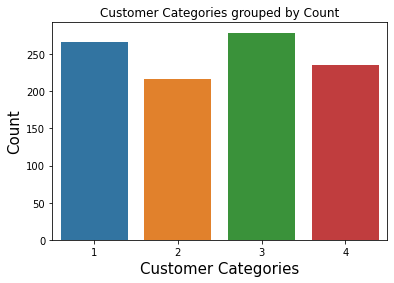

In [9]:
ax= sns.countplot(x='custcat',data=df)
plt.xlabel('Customer Categories',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Customer Categories grouped by Count')
plt.show()
# 1- Basic Service.
# 2- E-Service.
# 3- Plus Service.
# 4- Total Service.

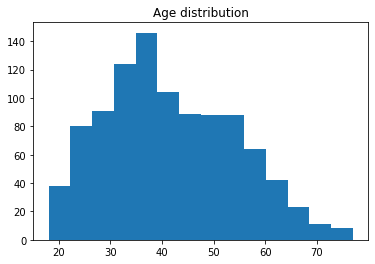

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 15)
plt.hist('age',data=df,bins=bins)
plt.title('Age distribution')
plt.show()

The ages are mostly between 30 and 45. Recalling the describe() function results this makes sense. The average age was ~41. There are less older customers, so this distribution is right-skewed because of its longer right tail.

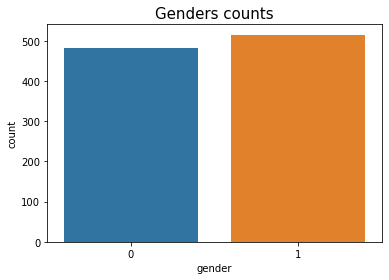

In [11]:
sns.countplot(x='gender',data=df)
plt.title('Genders counts',fontsize=15)
plt.show()

Females are slightly more that Males in this data.

Let's have a look to the age distribution grouped by gender

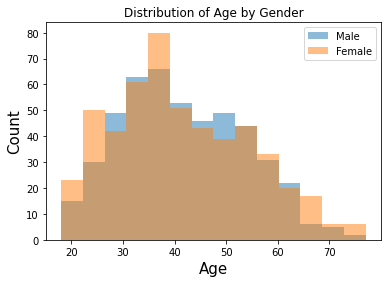

In [12]:
bins= np.linspace(df.age.min(),df.age.max(),15)
plt.hist('age',data=df[df['gender']==0],alpha=0.5,label='Male',bins=bins)
plt.hist('age',data=df[df['gender']==1],alpha=0.5,label='Female',bins=bins)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best')
plt.show()

We can see the distribution of the Age are very close for both genders, as we can also confirm that they have the same Mean as the following

In [13]:
df[['age','gender']].groupby('gender').mean()

,age
gender,
0,41.756757
1,41.477670


Compering the above income histogram with the describe() result we can observe the average income is around 77 K

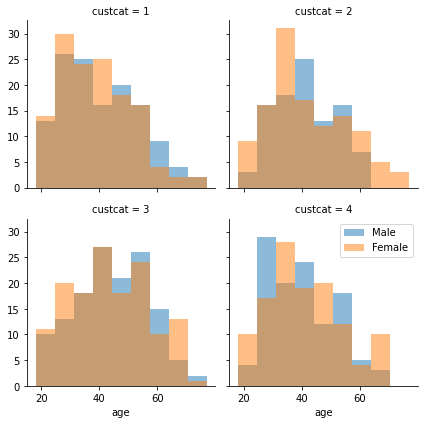

In [14]:
bins= np.linspace(df.age.min(),df.age.max(),10)
g= sns.FacetGrid(df,col='custcat',hue='gender',col_wrap=2)
g.map(plt.hist,'age',bins=bins,alpha=0.5)
g.axes[-1].legend(['Male','Female'])
plt.show()

We can see that there is a slightly different between the age and gender distributions for each customer category

Let's have a look at the distribution of the income

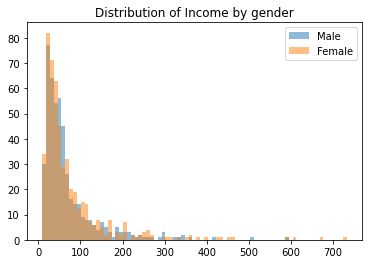

In [15]:
bins = np.linspace(df.income.min(), df.income.max(), round(df.income.std()))
plt.hist('income',data=df[df['gender']==0],alpha=0.5,label='Male',bins=bins)
plt.hist('income',data=df[df['gender']==1],alpha=0.5,label='Female',bins=bins)
plt.legend()
plt.title('Distribution of Income by gender')
plt.show()

As we can see the Income distribution is right skewed and as we saw in the describe() table the mean was around 70K

Now let's have a look at the income distribution for each custcat

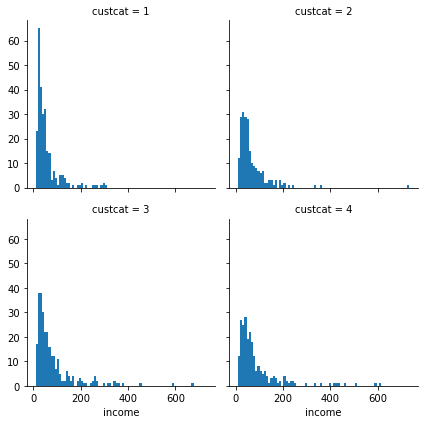

In [16]:
bins= np.linspace(df.income.min(),df.income.max(),round(df.income.std()))
g= sns.FacetGrid(df,col='custcat',col_wrap=2)
g.map(plt.hist,'income',bins=bins)
# g.axes[-1].legend()
plt.show()

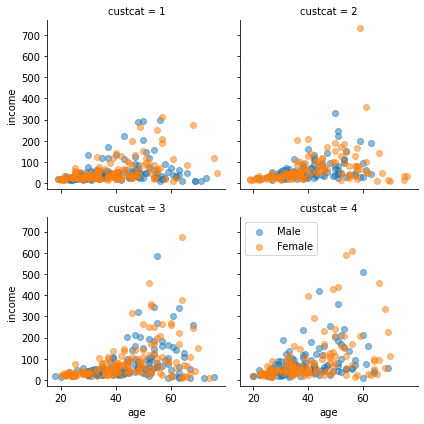

In [34]:
g= sns.FacetGrid(df,col='custcat',hue='gender',col_wrap=2)
g.map(plt.scatter,'age','income',alpha=0.5)
g.axes[-1].legend(['Male','Female'],loc='best')
plt.show()

We can see the income become higher for ages between 40 and 60 regardless of gender.<br>
and for clusters 3 and 4 the correlation between age and income is more pronounced.

And finally let's have a look at the education and custcat correlation

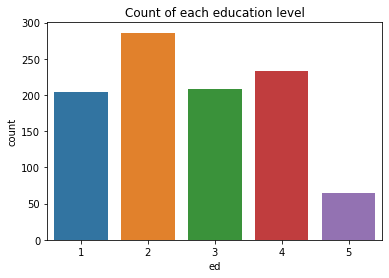

In [18]:
sns.countplot('ed',data=df,order=np.unique(df['ed']))
plt.title('Count of each education level')
plt.show()

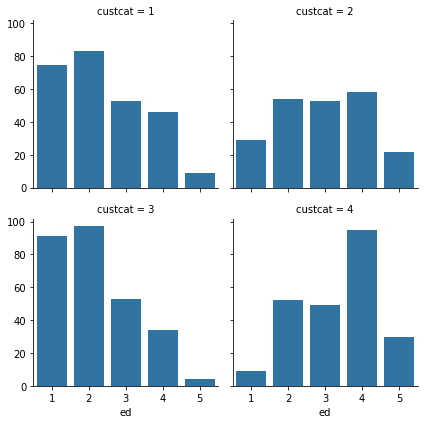

In [19]:
g= sns.FacetGrid(df,col='custcat',col_wrap=2)
g.map(sns.countplot,'ed',order= np.unique(df['ed']))
plt.show()

### 3.2 Preprocessing
As we can see from the above description and distribution our data is cleaned enough.<br>
Except that we need to do **Feature Selection** and  **Normalization**.

#### 3.2.1 Feature Selection
**Feature Selection** is the process of choosing the features that will be used to train our models.

In [20]:
x= df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

y= df['custcat']

#### 3.2.2 Normalization
**Normalization** is a statistical method that helps mathematical based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize out dataset.

In [21]:
x= np.nan_to_num(x) # conver nan values into zeros
x= StandardScaler().fit_transform(x)
x[:2,:]

array([[-0.02585103, -1.05207053,  0.19067508,  1.00604235, -0.24793174,
        -0.1149996 ,  1.09113421, -0.59050008, -0.22254397, -1.03473961,
        -0.23283577],
       [ 1.2002266 , -1.14579283, -0.68780943,  1.00604235, -0.44707691,
         0.78926039,  1.91010157, -0.59050008, -0.22254397, -1.03473961,
         2.55280295]])

## 4. Classification
We are going to create 4 models using the followoing algorithm with a train set:
-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

Then we will use a test set to report the accuracy of the model. to choose the suitable algorithm.

#### Import Libraries

In [22]:
# train_test_split
from sklearn.model_selection import train_test_split

# classifiers libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression

# Evaluation libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### Train-Test Split

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=4)
print('Train set: ',x_train.shape, y_train.shape)
print('Test set: ',x_test.shape, y_test.shape)

Train set:  (796, 11) (796,)
Test set:  (200, 11) (200,)


### 4.1 KNN
For KNN model we need to choose the best **K** value to build the model with the best accuracy.

In [24]:
Ks= 15 
dict={}
for k in range(1,Ks):
    neigh= KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    
    yhat=neigh.predict(x_test)
    
    dict[k]= accuracy_score(y_test,yhat)

k= sorted(dict, key=dict.get, reverse=True)[0]
print('The best K value is {} with accuracy score {}'.format(k,dict[k]))

The best K value is 12 with accuracy score 0.36


Now let's build our KNN model using the above K value.

In [25]:
KNN= KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

### 4,2 Decision Tree

In [26]:
DecisionTree= DecisionTreeClassifier(criterion='entropy', max_depth=4)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 4.3 Support Vector Machine (SVM)

In [27]:
SVM= svm.SVC(kernel='rbf')
SVM.fit(x_train,y_train)

SVC()

### 4.4 Logistic Regression

In [28]:
LR= LogisticRegression(C=0.01,solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

## 5. Model Evaluation
Now we have our models built let's evaluate them using the test set to choose the best model.

#### 5.1 Prediction 
Predict test data for each model

In [29]:
KNN_predict=KNN.predict(x_test)
DecisionTree_predict= DecisionTree.predict(x_test)
SVM_predict= SVM.predict(x_test)
LR_predict= LR.predict(x_test)
LR_predict_proba= LR.predict_proba(x_test)

#### 5.2 Evaluation
First let's create function for each evaluation metric.

In [30]:
def accuracy(yhat):
    return round(accuracy_score(y_test,yhat),2)

def f1(yhat):
    return round(f1_score(y_test,yhat,average='weighted'),2)

def jaccard(yhat):
    return round(jaccard_score(y_test,yhat,average='weighted'),2)

def logloss(yhat):
    return round(log_loss(y_test,yhat),2)

Now as we need to create a report for each model and its evaluation metrics. let's apply the models in the above functions and save the values in dictionary to create a DataFrame using this dictionary.

In [31]:
data= {'Algorithm': ['KNN','Decision Tree','SVM','Logistic Regression'],
      'Accuracy': [accuracy(KNN_predict),accuracy(DecisionTree_predict),accuracy(SVM_predict),accuracy(LR_predict)],
       'Jaccard': [jaccard(KNN_predict),jaccard(DecisionTree_predict),jaccard(SVM_predict),jaccard(LR_predict)],
       'F1-Score':[f1(KNN_predict),f1(DecisionTree_predict),f1(SVM_predict),f1(LR_predict)],
       'LogLoss':['NA','NA','NA',logloss(LR_predict_proba)]
      }

### 6. Results

In [32]:
report= pd.DataFrame(data).set_index('Algorithm',drop=True)
report

,Accuracy,Jaccard,F1-Score,LogLoss
Algorithm,,,,
KNN,0.36,0.21,0.35,NA
Decision Tree,0.34,0.19,0.32,NA
SVM,0.36,0.22,0.36,NA
Logistic Regression,0.41,0.25,0.40,1.28


We can see from the above report that **Logistic Regression** is the most appropriate model to predict the customer categories.